# The Rotated MITgcm!

In [33]:
import xarray as xr
import numpy as np
import xgcm
from xmitgcm import open_mdsdataset
from matplotlib import pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 16

import warnings
warnings.filterwarnings('ignore', '.*FutureWarning*.')
warnings.filterwarnings('ignore', '.*.')

div_cmap = plt.get_cmap('RdBu_r')
div_cmap.set_bad(color=(0.8,0.8,0.8))

cmap = plt.get_cmap('viridis')
cmap.set_bad(color=(0.8,0.8,0.8))

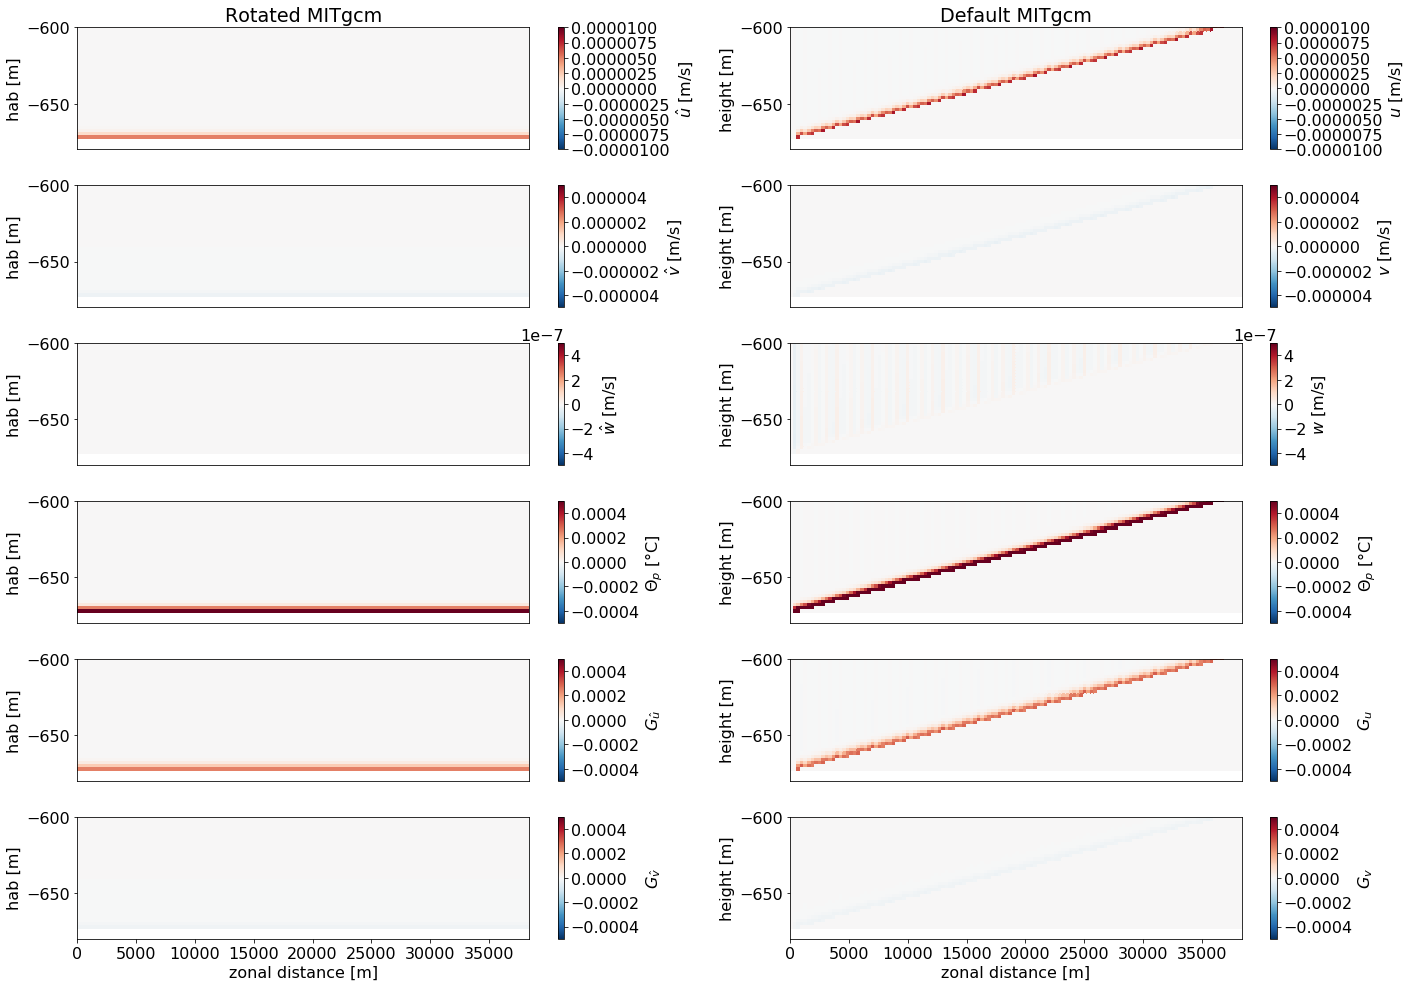

In [37]:
Iter0 = 50
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
dsog = ds
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

plt.figure(figsize=(20,14))

plt.subplot(6,2,1)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
q.set_clim([-1e-5,1e-5])
plt.title('Rotated MITgcm')
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{u}$ [m/s]')

plt.subplot(6,2,3)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-6,5e-6])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{v}$ [m/s]')

plt.subplot(6,2,5)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-7,5e-7])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{w}$ [m/s]')

plt.subplot(6,2,7)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,2,9)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$G_{\hat{u}}$')

plt.subplot(6,2,11)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{\hat{v}}$')

data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_nonrotated_control/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

ds0 = open_mdsdataset(data_dir,iters=[10],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])

ds['THETA'] = ds['THETA'] - ds0['THETA'].values

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

plt.subplot(6,2,2)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('Default MITgcm')
q.set_clim([-1e-5,1e-5])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$u$ [m/s]')

plt.subplot(6,2,4)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-6,5e-6])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$v$ [m/s]')

plt.subplot(6,2,6)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-7,5e-7])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$w$ [m/s]')

plt.subplot(6,2,8)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,2,10)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$G_{u}$')

plt.subplot(6,2,12)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('height [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{v}$')

plt.tight_layout()
plt.savefig('/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/figures/rotated_bbl.png',bbox_inches='tight',dpi=150)

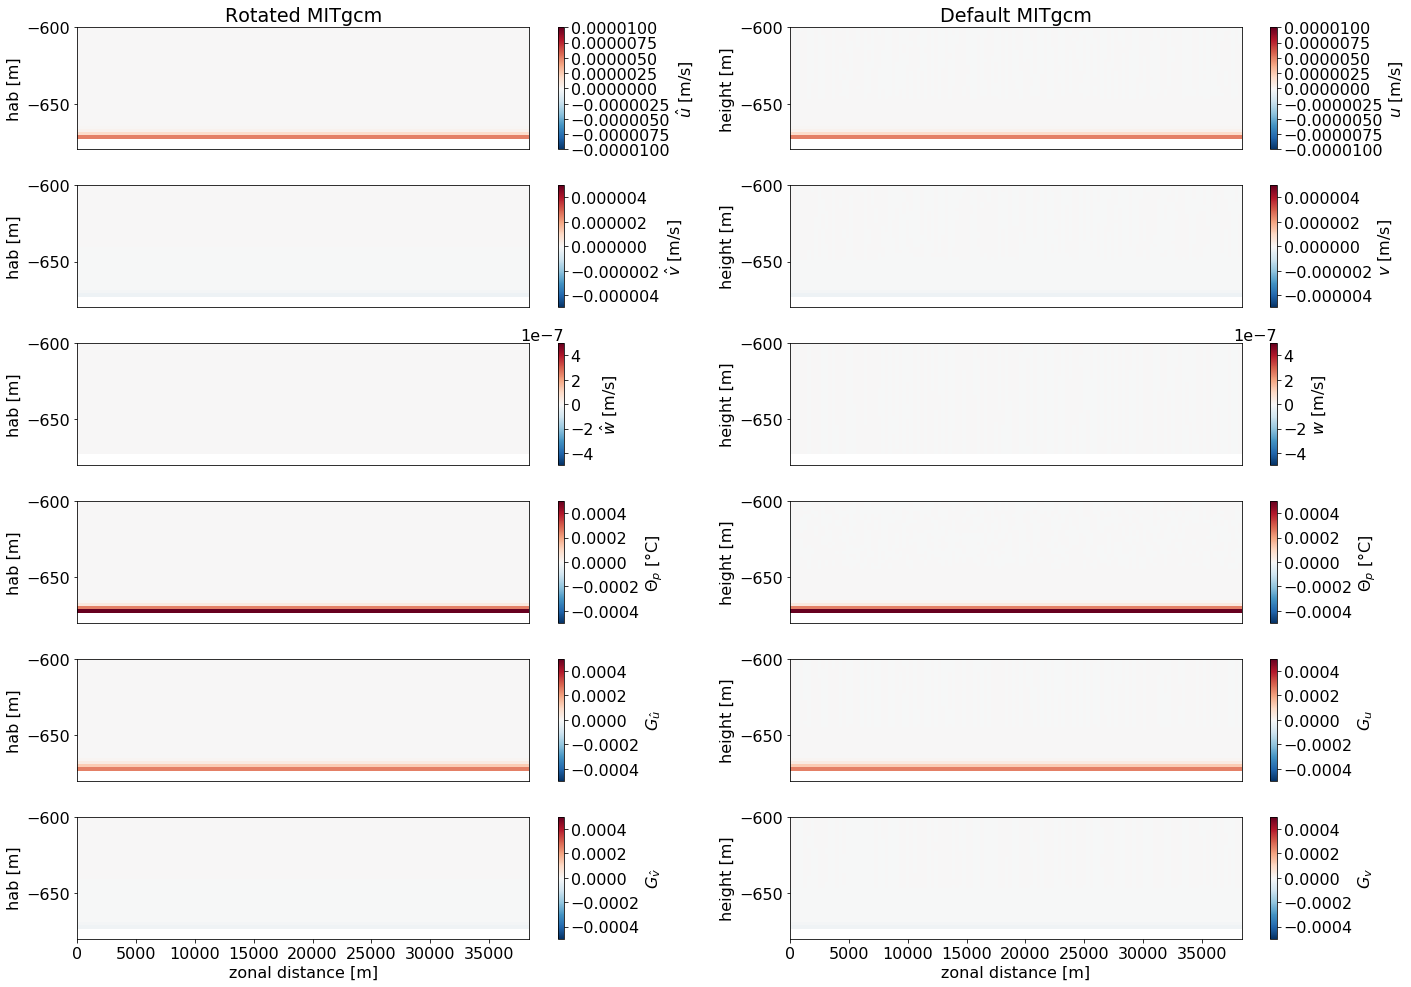

In [38]:
Iter0 = 50
data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
dsog = ds
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

plt.figure(figsize=(20,14))

plt.subplot(6,2,1)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
q.set_clim([-1e-5,1e-5])
plt.title('Rotated MITgcm')
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{u}$ [m/s]')

plt.subplot(6,2,3)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-6,5e-6])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{v}$ [m/s]')

plt.subplot(6,2,5)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-7,5e-7])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\hat{w}$ [m/s]')

plt.subplot(6,2,7)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,2,9)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('')
plt.xticks([])
q.colorbar.set_label(r'$G_{\hat{u}}$')

plt.subplot(6,2,11)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('hab [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{\hat{v}}$')

data_dir = "/nobackup1/hdrake/mitgcm_static/TurbulentCirculation/rotated_setups/3d_rotated_perturbations_noisy/run"
ds = open_mdsdataset(data_dir,iters=[Iter0],ignore_unknown_vars=True,prefix=["standardDiag","Diag"])
ds['time'] = ds['time']*60 # convert from iterations to seconds
grid = xgcm.Grid(ds, periodic=['X','Y'])

coords = ds.coords.to_dataset().reset_coords()
ds = ds.reset_coords(drop=True)
coords['dV'] = coords['rA']*(coords['drF']*coords['hFacC'])

plt.subplot(6,2,2)
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('Default MITgcm')
q.set_clim([-1e-5,1e-5])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$u$ [m/s]')

plt.subplot(6,2,4)
q = ds['VVEL'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-6,5e-6])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$v$ [m/s]')

plt.subplot(6,2,6)
q = ds['WVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-7,5e-7])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$w$ [m/s]')

plt.subplot(6,2,8)
q = ds['THETA'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$\Theta_{p}$ [$\degree$C]')

plt.subplot(6,2,10)
q = ds['TOTUTEND'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.xlabel('')
plt.xticks([])
plt.ylabel('height [m]')
q.colorbar.set_label(r'$G_{u}$')

plt.subplot(6,2,12)
q = ds['TOTVTEND'].sel(YG=coords['YG'][0]).plot(cmap=div_cmap)
plt.title('')
q.set_clim([-5e-4,5e-4])
plt.ylim([-680,-600])
plt.ylabel('height [m]')
plt.xlabel('zonal distance [m]')
q.colorbar.set_label(r'$G_{v}$')

plt.tight_layout()

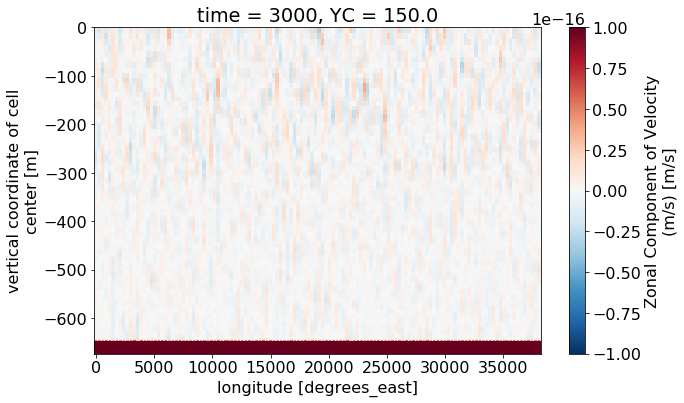

In [43]:
q = ds['UVEL'].sel(YC=coords['YC'][0]).plot(cmap=div_cmap)
q.set_clim([-1.e-16,1.e-16])